<a href="https://colab.research.google.com/github/hamednasr/deep-learning/blob/main/DUDL_GPU_implement.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# COURSE: A deep understanding of deep learning
## SECTION: Running models on a GPU
### LECTURE: Implementation
#### TEACHER: Mike X Cohen, sincxpress.com
##### COURSE URL: udemy.com/course/dudl/?couponCode=202109

In [38]:
# import libraries
import torch
import torch.nn as nn
import matplotlib.pyplot as plt
import time

# Select the processor device

In [ ]:
## Note: To run models on a GPU you must select from the menu:
#   -> Runtime
#     -> Change runtime type
#       -> Hardware accelerator
#         -> GPU

In [6]:
torch.device

torch.device

In [4]:
# use GPU
device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')
print(device)

cuda:0


# Build a simple model

In [25]:
net = nn.Sequential(
    nn.Linear(20,100),
    nn.ReLU(),
    nn.Linear(100,500),
    nn.ReLU(),
    nn.Linear(500,30),
    nn.ReLU(),
    nn.Linear(30,2)
      )

# Make some data

In [26]:
# just some random fluff
data   = torch.randn((1000,20)) # samples X features
labels = torch.randint(low=0,high=2,size=(1,1000))

# Send the model and the data to the GPU

In [27]:
# model
net.to(device)

# data
data   = data.to(device)
labels = labels.to(device)

In [28]:
data

tensor([[ 1.6724, -0.1334,  0.6315,  ..., -1.1067, -0.7506,  0.2083],
        [ 0.7349,  1.4348,  0.1151,  ..., -0.7256,  0.7897, -0.0277],
        [ 0.5005, -0.8412, -0.2732,  ...,  0.8237, -0.5094, -1.4706],
        ...,
        [ 1.1820,  0.1679,  0.3781,  ..., -0.7059,  0.6417,  1.7013],
        [ 0.5468, -0.7145, -0.9026,  ...,  1.3308, -0.6642,  0.6431],
        [ 0.2213,  0.4510,  0.3334,  ...,  1.2523,  1.1413, -0.0345]])

In [29]:
# you can also create data directly on the GPU
dataG = torch.randn((1000,20),device=device)
dataC = torch.randn((1000,20),device='cpu')

print(data.device)
print(dataG.device)
print(dataC.device)

cpu
cpu
cpu


# Getting results from the model

In [30]:
output = net(data)

In [31]:
output.device

device(type='cpu')

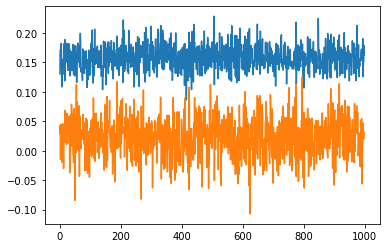

In [32]:
# try to plot the data
# plt.plot(output.detach());

plt.plot(output.detach().cpu());

# Experiment: Computation time

In [33]:
# start the clock
starttime = time.process_time()

# move, run, retrieve
device = 'cuda:0'
net.to(device)
data   = data.to(device)
labels = labels.to(device)
output = net(data).detach().cpu()

# stop the clock
GPUtime = 1000*(time.process_time() - starttime)

In [34]:
# start the clock
starttime = time.process_time()

# move, run, retrieve
device = 'cpu'
net.to(device)
data   = data.to(device)
labels = labels.to(device)
output = net(data).detach().cpu()

# stop the clock
CPUtime = 1000*(time.process_time() - starttime)

In [35]:
# time in ms
[CPUtime,GPUtime]

[8.047608999994793, 3.4166109999986816]

In [36]:
# but maybe "sending" it to the CPU takes too much overhead?

In [37]:
# recreate network and data
net  = nn.Sequential(nn.Linear(20,100),nn.ReLU(),nn.Linear(100,500),nn.ReLU(),nn.Linear(500,30),nn.ReLU(),nn.Linear(30,2))
data = torch.randn((1000,20))

# rerun the experiment
starttime = time.process_time()
output    = net(data).detach()
CPUtime2  = 1000*(time.process_time() - starttime)

# report the results
[CPUtime2,CPUtime,GPUtime]

[5.306361000002369, 8.047608999994793, 3.4166109999986816]